# Probability and Distributions Lab:
## Beverage Filling Process
You're working as a junior quality analyst at a beverage company that produces 12-ounce soft drinks. The filling process naturally has some variation, and underfilled bottles lead to customer complaints while overfilled bottles waste product. Your supervisor has asked you to analyze the filling data. You will first address initial probability word problem questions using hypothetical data and the varying laws of probability. These scenarios represent potential uses of conditional probability and bayes theorem. 

Next you will move into conducting an analysis of fill data using properties of the normal distribution. Recent studies suggest that customers notice when bottles are underfilled by more than 0.3 ounces, while overfilling by more than 0.2 ounces impacts company profits. This information has been used to set quality control rejection limits of 11.7 and 12.2 oz. You'll need to analyze the fill amounts, determine if they follow a normal distribution, and establish if the company’s current fill process is within acceptable control limits. They would like to achieve a maximum rejection percentage of 5%.

Your analysis needs to answer three key questions:
- Does the filling process follow a normal distribution?
- What are the probabilities of under-filling (less than 11.7 oz) or over-filling (more than 12.2 oz)?
- Is the current fill process below the maximum rejection percentage of 5%?




In [1]:
# CodeGrade step0
# Run this cell without changes
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv('bottle_fills.csv')
data

,timestamp,fill_amount
0,2024-01-15 08:00:00,12.049671
1,2024-01-15 08:00:30,11.986224
2,2024-01-15 08:01:00,12.064869
3,2024-01-15 08:01:30,12.152453
4,2024-01-15 08:02:00,11.976785
...,...,...
995,2024-01-15 16:17:30,12.021690
996,2024-01-15 16:18:00,12.229619
997,2024-01-15 16:18:30,12.113984
998,2024-01-15 16:19:00,11.992832


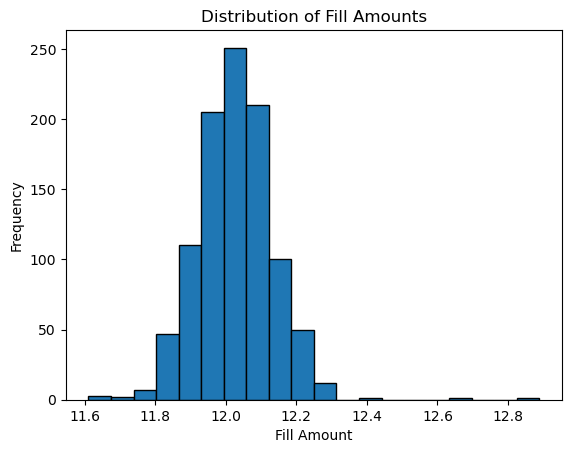

In [3]:
plt.hist(data['fill_amount'], bins=20, edgecolor='black')

plt.title('Distribution of Fill Amounts')
plt.xlabel('Fill Amount')
plt.ylabel('Frequency')

plt.show()

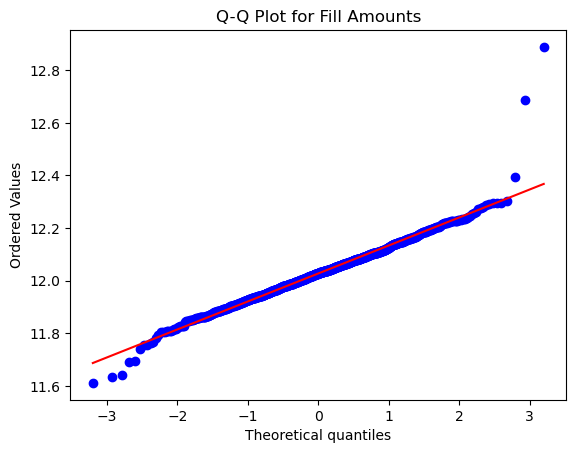

In [4]:
# Q-Q
# the q-q plot shows most of the data falls on the read line with few outliers, so I will take everthing as normal distribution

stats.probplot(data['fill_amount'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Fill Amounts")
plt.show()

In [5]:
mean = np.mean(data['fill_amount'])
mean

12.02723333476538

In [6]:
std = np.std(data['fill_amount'])
std

0.10829788233343839

In [7]:
# Probability under the 11.7
p_under = stats.norm.cdf(11.7, loc=mean, scale=std)
p_under

0.001257195468529117

In [8]:
# Probability above 12.2
p_over = 1 - stats.norm.cdf(12.2, loc=mean, scale=std)
p_over

0.055323559496119556

In [9]:
# add both for total rejection
p_over + p_under 

0.05658075496464867

Is the current fill process below the maximum rejection percentage of 5%?

No

## Probability Word Problems


### Scenario 1
In your initial analysis of the filling process, you examine two production lines (A and B). When analyzing a day's data:

- 40% of bottles come from Line A
- 60% of bottles come from Line B
- 3% of Line A bottles are outside specification limits
- 2% of Line B bottles are outside specification limits

If a bottle is randomly selected and found to be outside specification limits, what is the probability it came from Line A?

In [10]:
# CodeGrade step1
prob_one = None

P_A = 0.4
P_B = 0.6
P_A_out = 0.03
P_B_out = 0.02

P_out = P_A_out*P_A + P_B_out*P_B

P_A_is_out = P_A_out*P_A / P_out
P_A_is_out

0.5

### Scenario 2
Your team needs to assess a possible mechanical issue with Line A. From maintenance records and historical data, you know:

- The baseline probability of Line A having a mechanical issue on any given day is 5% (prior probability)
- When Line A has a mechanical issue, 80% of daily samples show high volume variability
- When Line A is operating normally, only 10% of daily samples show high volume variability

Today's quality report shows high volume variability in the samples. What is the probability that Line A has a mechanical issue?

In [11]:
# CodeGrade step2
prob_two = None

P_issue = 0.05
P_no_issue = 1 - P_issue
P_A_issue = 0.8
P_A_no_issue = 0.10

P_issue = P_A_issue * P_issue / (P_A_issue * P_issue + P_A_no_issue * P_no_issue)
P_issue

0.29629629629629634

### Scenario 3
The quality team has implemented a new inspection system that takes two measurements of each bottle. From analyzing recent data:

- 95% of truly underfilled bottles (<11.7 oz) are correctly identified as underfilled on the first measurement
- 98% of properly filled bottles are correctly identified as proper on the first measurement
- If a bottle fails the first measurement, it is measured again
- 90% of truly underfilled bottles are identified correctly on the second measurement
- 95% of properly filled bottles are identified correctly on the second measurement
- 3% of all bottles are underfilled based on prior information

If a bottle fails both measurements, what is the probability that it is actually underfilled? Treat each test as independent. 

This problem involves multiple conditional probabilities. 

Use Bayes' Theorem:

P(Underfilled | Both Fail) = P(Both Fail | Underfilled) × P(Underfilled) / P(Both Fail)

In [12]:
# CodeGrade step3
prob_three = None

P_under = 0.03
P_good = 1 - P_under

# Both Failing
P_fail_both_under = 0.95 * 0.9
P_fail_both_proper = 0.02 * 0.05

# Total
P_fail_both_tot = P_fail_both_under * P_under + P_fail_both_proper  * P_good

# P(Underfilled | Both Fail) = P(Both Fail | Underfilled) × P(Underfilled) / P(Both Fail)
P_under_both_fail = P_fail_both_under * P_under / P_fail_both_tot
P_under_both_fail

0.9635612321562735

## Data Analysis Setup

### Load in the Data

Load the bottle_fills.csv file using pandas.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

It didn't say I need to use other than pandas in the previous part

In [13]:
# CodeGrade step4
# Your code to load the data
data_df = pd.read_csv('bottle_fills.csv')
data_df

,timestamp,fill_amount
0,2024-01-15 08:00:00,12.049671
1,2024-01-15 08:00:30,11.986224
2,2024-01-15 08:01:00,12.064869
3,2024-01-15 08:01:30,12.152453
4,2024-01-15 08:02:00,11.976785
...,...,...
995,2024-01-15 16:17:30,12.021690
996,2024-01-15 16:18:00,12.229619
997,2024-01-15 16:18:30,12.113984
998,2024-01-15 16:19:00,11.992832


### Examine the data (basic statistics)

Examine the dataset and create visualizations to understand the distribution.

In [14]:
# CodeGrade step5
# Quick and dirty look using pandas to get summary statistics
basic_stats_describe = data_df.describe()
basic_stats_describe

,fill_amount
count,1000.000000
mean,12.027233
std,0.108352
min,11.611045
25%,11.958052
50%,12.028160
75%,12.091863
max,12.888700


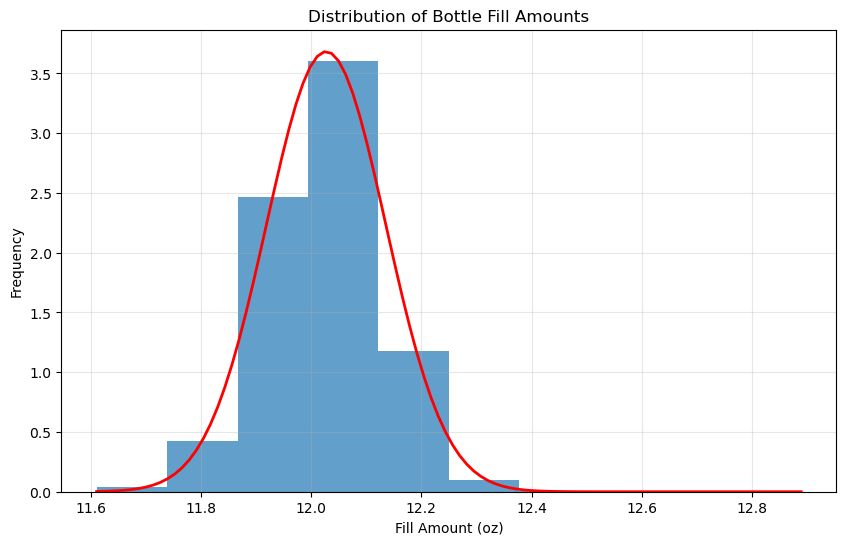

In [15]:
# CodeGrade step6
# Create a histogram with normal curve overlay
bins = 'auto'
data = data_df['fill_amount']

# Create histogram using plt.hist()
plt.figure(figsize=(10, 6))
histogram_answer = data_df['fill_amount'].plot(kind='hist', density=True, alpha=0.7)

# Calculate parameters for normal distribution overlay (use data variable or basic_stats_describe object)
mean = data_df['fill_amount'].mean()
std = data_df['fill_amount'].std()

# Add normal curve overlay using plt.plot()
x = np.linspace(data_df['fill_amount'].min(), data_df['fill_amount'].max(), 100)
p = stats.norm.pdf(x, np.mean(data_df['fill_amount']), np.std(data_df['fill_amount']))
plt.plot(x, p, 'r', linewidth=2)

# Display visual
plt.title('Distribution of Bottle Fill Amounts')
plt.xlabel('Fill Amount (oz)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

### Verify Empirical Rule Application
Now let's verify if our data follows a normal distribution using the Empirical Rule.

In [16]:
# CodeGrade step7
data = data_df['fill_amount']
mean = np.mean(data)
std = np.std(data)

# Calculate percentage of data within 1, 2, and 3 standard deviations
one_sd = np.mean(np.abs(data - mean) <= std)
two_sd = np.mean(np.abs(data - mean) <= 2*std)
three_sd = np.mean(np.abs(data - mean) <= 3*std)

In [17]:
# Run this cell without changes to verify
print(one_sd, two_sd, three_sd)

0.712 0.965 0.992


results = {'mean': mean_duration,'std': std_duration, 'within_1_std': np.mean(np.abs(call_durations - mean_duration) <= std_duration), 
           'within_2_std': np.mean(np.abs(call_durations - mean_duration) <= 2 * std_duration),
           'within_3_std': np.mean(np.abs(call_durations - mean_duration) <= 3 * std_duration)}
results

While this isn't perfectly normal according to the empirical rule (no real world data is), based on our histogram above and these calculations our data is 'normal enough' to continue.

## Quality Control Analysis

Calculate probabilities of underfilling and overfilling based on specifications.

Key considerations:
- Customers notice when bottles are underfilled by more than 0.3 ounces
- Overfilling by more than 0.2 ounces impacts company profits
- You need to analyze fill amounts, verify normal distribution, and compare fills to expected rejections

### Probability of Underfilling

In [18]:
# CodeGrade step8
# Target fill amount is 12 oz
data = data_df['fill_amount']
mean = np.mean(data)
std = np.std(data)

# Calculate probability of underfilling (< 11.7 oz)
underf = 11.7
z_score_under = (underf - mean)/std                 # stats.zscore(data)

# Use normal distribution to calculate probability (times by 100 for percentage numbers)
underfill_prob = stats.norm.cdf(z_score_under)
underfill_prob

0.001257195468529117

In [19]:
stats.norm.cdf(11.7, loc=mean, scale=std)

0.001257195468529117

### Probability of Overfilling

In [20]:
# CodeGrade step9
# Target fill amount is 12 oz
data = data_df['fill_amount']
mean = np.mean(data)
std = np.std(data)

# Calculate probability of overfilling (> 12.2 oz)
overf = 12.2
z_score_over = (overf - mean)/std 

# Use normal distribution to calculate probability (times by 100 for percentage numbers)
overfill_prob = 1 - stats.norm.cdf(z_score_over)
overfill_prob

0.055323559496119556

In [21]:
1 - stats.norm.cdf(12.2, loc=mean, scale=std)

0.055323559496119556

### Acceptable Limits

In [22]:
# CodeGrade step10
data = data_df['fill_amount']
mean = np.mean(data)
std = np.std(data)

# Calculate percentage of bottles within acceptable limits
acceptable_percentage = 1 - overfill_prob - underfill_prob
acceptable_percentage

0.9434192450353514

## Recommendations

### Total Rejection Rate
Does the current process meets the 5% rejection expectation?



In [23]:
# CodeGrade step11
excepted_rate = 0.05

# Rate of not accectable fills (can use answers above to calculate)
total_rejection_rate = overfill_prob - underfill_prob

met_expectations = excepted_rate > total_rejection_rate
met_expectations

False

## Submission Instructions

1. Make sure all variable initially assigned as 'None' have been filled in with appropriate code or values
2. Run all cells to verify your code works without errors
3. Save and submit your completed notebook to CG via the canvas assignment page